# Author:Hana Ben Ali
# # Predict the percentage of a student based on the nb of study hours 

#Prediction using supervised machine learning 
#simple linear regression task it involves just 2 variables 

## Step 1: Import Libraries ,reading dataset


In [232]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [233]:
data=pd.read_csv ("student_scores - student_scores.csv")

In [234]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [235]:
np.shape(data)

(25, 2)

In [236]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [237]:
#Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels".
#Our attribute set will consist of the "Hours" column, and the label will be the "Score" column

In [238]:
x=data[['Hours']].values.reshape(-1,1) 
y=data[['Scores']].values.reshape(-1,1)
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

## Step2:Visualizing the dataset

Text(0, 0.5, 'Scores')

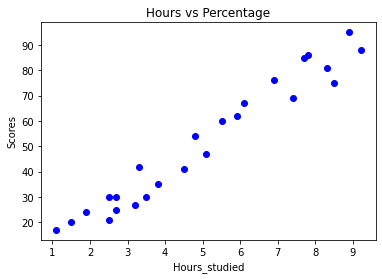

In [239]:
%matplotlib inline 
plt.scatter(x,y,color='blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours_studied')
plt.ylabel('Scores')

## Step3:splitting the data into training and testing splits( test_size=0.2)

In [240]:
x_train ,x_test ,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

## Step4:training the algorithm

In [241]:
regressor=LinearRegression()


In [242]:
regressor.fit(x_train,y_train)

LinearRegression()

In [243]:
regressor.intercept_

array([2.82689235])

In [244]:
#this means for every one unit increase in the hours studied, the change in the score is about 2.83%

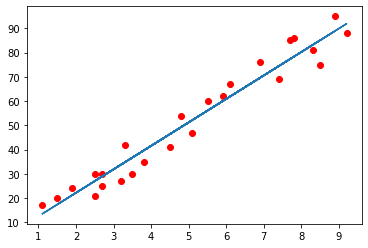

In [245]:
line_fitted =regressor.coef_*x+regressor.intercept_
plt.plot(x,line_fitted)
plt.scatter(x,y,color='red')


In [246]:
#Making predictions and compare 

In [247]:
y_pred=regressor.predict(x_test)

In [248]:
pd.DataFrame((zip(y_pred,y_test)),columns =['Predicted', 'Actual'])

,Predicted,Actual
0,[83.18814103588203],[81]
1,[27.03208774003898],[30]
2,[27.03208774003898],[21]
3,[69.63323161964405],[76]
4,[59.951153465188355],[62]


## what will be predicted score if a student studies for 9.25 hours a day?

In [249]:
hours_studied= 9.25
score_obtained= regressor.predict([[hours_studied]])
print ("if a student study= {}\nhe will probably obtain a score = {}  ".format(hours_studied,score_obtained[0][0]))

if a student study= 9.25
he will probably obtain a score = 92.38611528261494  


## Model Evaluation   (RMSE,R^2)

#### RMSE (the most popular metric used)

In [250]:
print ("Root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)) )

Root_mean_squared_error: 4.352380006653288


####   RMSE calculated   is low 

#### R^2 score

In [251]:
print ("R^2 score:",regressor.score(x_test, y_test)) # the R^2 score by default

R^2 score: 0.9678055545167994


#### That means that 96% of the variable "Hours" are explained by the variable "score"

#### This is the best case since the predictions are accurate (low RMSE) 4.352380006653288 and the predictor mostly determines the observed value (high R²) 0.9678055545167994

# thank you 😊